In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)
import random
from  keras.preprocessingsingsing.image import save_img
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
import yaml
from Util import *
from IPython import display
%matplotlib inline

Using TensorFlow backend.
2022-01-14 17:20:20.927814: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-14 17:20:21.012865: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-14 17:20:21.013272: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.755GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-01-14 17:20:21.013319: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-14 17:20:21.013698: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 1 

In [2]:
#Global configuration
attackMode = 'Raw' #Raw: means without defense, Detection: With adversarial exmaples detection
queryBudgets = 500 #Query Budgets
NumberOfTest = 100 #Number of test images
random.seed(42) #Set random seeds

2022-01-14 17:20:24.055972: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-01-14 17:20:24.202257: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-01-14 17:20:24.873476: W tensorflow/stream_executor/gpu/redzone_allocator.cc:312] Not found: ./bin/ptxas not found
Relying on driver to perform ptx compilation. This message will be only logged once.


6: 0.9942889
2: 0.0026954121
4: 0.0018765273
3: 0.0010828591
5: 5.5464036e-05
9: 4.4001203e-07


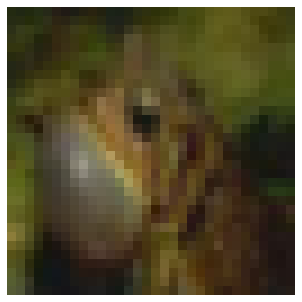

In [3]:
#Prepare test images
File,ImgPre = ResultSave('HJSA-l2','./CIFAR')#Result saving folder and filename
ImgSet=[]
if os.path.isfile(File):
    HISTORY = LOAD(File)#Load Checkpoint
else:
    HISTORY = []
StartPoint=len(HISTORY)
for i in range(NumberOfTest):
    ImgSet.append(randomimg(mode=attackMode))
display_images(ImgSet[-1].img)

In [4]:
#Run the experiments
from HJSA import hsja
constraint = 'l2'#norm: l2; linf
for i in range(len(HISTORY),NumberOfTest):
    print("round "+str(i),end=': ')
    image = ImgSet[i]
    if i<StartPoint:
        continue
    with tf.device('/GPU:0'): 
        timehistory,adversarial = hsja(image,constraint=constraint,max_query=queryBudgets)
    if not adversarial is None:
        np.save(ImgPre+str(i),adversarial)
    print('Attack result: L2:{0}, Linf:{1}'.format(image.maxl2,image.maxlinf))
    History=[image.historyl2,image.historylinf,timehistory]
    HISTORY.append(History)
    SAVE(File,HISTORY)


round 0: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 3.3025E+00
iteration: 2, l2 distance 2.3908E+00
iteration: 3, l2 distance 1.9103E+00
Attack result: L2:1.910292387008667, Linf:0.1301732212305069
round 1: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 2.3875E+01
iteration: 2, l2 distance 1.6936E+01
iteration: 3, l2 distance 9.8374E+00
Attack result: L2:9.837425231933594, Linf:0.3398210406303406
round 2: Attack result: L2:27.64120101928711, Linf:1.0
round 3: Attack result: L2:3.874685525894165, Linf:0.1242619976401329
round 4: Attack result: L2:5.883572578430176, Linf:0.18540219962596893
round 5: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 2.1135E+00
iteration: 2, l2 distance 1.4554E+00
iteration: 3, l2 distance 1.0705E+00
Attack result: L2:1.0704563856124878, Linf:0.06642311066389084
round 6: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 4.7023E+00
iteration: 2, l2 distance 2.8145E+00
iteration: 3, l2 distance 1.6926E+00
Attack result: L2:1.692617416381836, Linf:0.10026873648166656
round 7: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 2.2803E+00
iteration: 2, l2 distance 1.0760E+00
iteration: 3, l2 distance 6.7173E-01
Attack result: L2:0.6717269420623779, Linf:0.04440626874566078
round 8: Attack result: L2:5.866744518280029, Linf:0.18677806854248047
round 9: Attack result: L2:7.718680381774902, Linf:0.24749647080898285
round 10: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 4.4340E-01
iteration: 2, l2 distance 1.7915E-01
iteration: 3, l2 distance 1.1794E-01
Attack result: L2:0.11794411391019821, Linf:0.006950467824935913
round 11: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 3.3085E+00
iteration: 2, l2 distance 2.1782E+00
iteration: 3, l2 distance 1.6362E+00
Attack result: L2:1.6362242698669434, Linf:0.10120093822479248
round 12: Attack result: L2:7.711510181427002, Linf:0.24851280450820923
round 13: Attack result: L2:13.665413856506348, Linf:0.43667536973953247
round 14: Attack result: L2:25.80890655517578, Linf:0.9019607827067375
round 15: Attack result: L2:3.978571653366089, Linf:0.12339720129966736
round 16: Attack result: L2:16.089433670043945, Linf:0.5606003403663635
round 17: Attack result: L2:5.723519802093506, Linf:0.18479964137077332
round 18: Attack result: L2:11.758322715759277, Linf:0.5608763098716736
round 19: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 3.8631E+00
iteration: 2, l2 distance 1.9052E+00
iteration: 3, l2 distance 1.2301E+00
Attack result: L2:1.230139136314392, Linf:0.08036573231220245
round 20: Attack result: L2:8.315169334411621, Linf:0.3086645305156708
round 21: Attack result: L2:7.938920497894287, Linf:0.24943983554840088
round 22: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 5.4386E+00
iteration: 2, l2 distance 4.0967E+00
iteration: 3, l2 distance 3.2597E+00
Attack result: L2:3.2596912384033203, Linf:0.230431467294693
round 23: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 9.4229E-02
iteration: 2, l2 distance 5.8481E-02
iteration: 3, l2 distance 4.0838E-02
Attack result: L2:0.04083757847547531, Linf:0.0027685165405273438
round 24: Attack result: L2:7.449419975280762, Linf:0.2482450008392334
round 25: Attack result: L2:13.28865909576416, Linf:0.49618953466415405
round 26: Attack result: L2:7.864437580108643, Linf:0.2495010495185852
round 27: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 3.9086E+00
iteration: 2, l2 distance 2.9660E+00
iteration: 3, l2 distance 2.3876E+00
Attack result: L2:2.3875515460968018, Linf:0.1534184217453003
round 28: Attack result: L2:5.699559211730957, Linf:0.1865832805633545
round 29: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 2.1676E+00
iteration: 2, l2 distance 1.4673E+00
iteration: 3, l2 distance 1.1498E+00
Attack result: L2:1.1498329639434814, Linf:0.0801122784614563
round 30: Attack result: L2:1.9285614490509033, Linf:0.0624585896730423
round 31: Attack result: L2:7.527379512786865, Linf:0.2478560358285904
round 32: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 4.4499E+00
iteration: 2, l2 distance 3.2175E+00
iteration: 3, l2 distance 2.4734E+00
Attack result: L2:2.4734437465667725, Linf:0.15820817649364471
round 33: Attack result: L2:5.910214424133301, Linf:0.18656741082668304
round 34: Attack result: L2:9.531765937805176, Linf:0.3106284737586975
round 35: Attack result: L2:30.772785186767578, Linf:0.9882352938875556
round 36: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 4.9547E+00
iteration: 2, l2 distance 3.6320E+00
iteration: 3, l2 distance 3.0825E+00
Attack result: L2:3.0824966430664062, Linf:0.22328513860702515
round 37: Attack result: L2:11.722557067871094, Linf:0.4352647066116333
round 38: Attack result: L2:5.753267288208008, Linf:0.18687918782234192
round 39: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 2.6632E+00
iteration: 2, l2 distance 1.4835E+00
iteration: 3, l2 distance 1.1137E+00
Attack result: L2:1.1136802434921265, Linf:0.07159510254859924
round 40: Attack result: L2:13.8849458694458, Linf:0.49745386838912964
round 41: Attack result: L2:24.486208601048347, Linf:0.9176470562815666
round 42: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 2.5818E+00
iteration: 2, l2 distance 1.5340E+00
iteration: 3, l2 distance 1.1737E+00
Attack result: L2:1.173668622970581, Linf:0.08604368567466736
round 43: Attack result: L2:3.8892016410827637, Linf:0.12385839223861694
round 44: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 7.2191E-01
iteration: 2, l2 distance 2.2386E-01
iteration: 3, l2 distance 1.3645E-01
Attack result: L2:0.13644881546497345, Linf:0.008108019828796387
round 45: Attack result: L2:38.4310302734375, Linf:1.0
round 46: Attack result: L2:3.9488637447357178, Linf:0.12420608103275299
round 47: Attack result: L2:3.0432910919189453, Linf:0.12300726771354675
round 48: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 1.7145E+00
iteration: 2, l2 distance 1.1217E+00
iteration: 3, l2 distance 8.4090E-01
Attack result: L2:0.8408956527709961, Linf:0.05642884969711304
round 49: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 2.1037E+00
iteration: 2, l2 distance 1.1926E+00
iteration: 3, l2 distance 8.8069E-01
Attack result: L2:0.8806904554367065, Linf:0.05354749411344528
round 50: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 3.2491E+00
iteration: 2, l2 distance 2.1517E+00
iteration: 3, l2 distance 1.6044E+00
Attack result: L2:1.6043580770492554, Linf:0.10176191478967667
round 51: Attack result: L2:12.799887657165527, Linf:0.6791338920593262
round 52: Attack result: L2:8.407845497131348, Linf:0.37115350365638733
round 53: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 3.4574E+00
iteration: 2, l2 distance 2.2906E+00
iteration: 3, l2 distance 1.8611E+00
Attack result: L2:1.8610596656799316, Linf:0.14839348196983337
round 54: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 3.8163E+00
iteration: 2, l2 distance 2.4782E+00
iteration: 3, l2 distance 1.8112E+00
Attack result: L2:1.811231255531311, Linf:0.10590934753417969
round 55: Attack result: L2:5.835903644561768, Linf:0.1858864277601242
round 56: Attack result: L2:5.770465850830078, Linf:0.1849099099636078
round 57: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 3.5547E+00
iteration: 2, l2 distance 2.3687E+00
iteration: 3, l2 distance 1.6201E+00
Attack result: L2:1.6201411485671997, Linf:0.12410233914852142
round 58: Attack result: L2:9.719817161560059, Linf:0.3115067481994629
round 59: Attack result: L2:13.16097354888916, Linf:0.7450223565101624
round 60: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 2.8516E+01
iteration: 2, l2 distance 2.5916E+01
iteration: 3, l2 distance 2.1721E+01
Attack result: L2:21.720767974853516, Linf:0.7054056525230408
round 61: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 2.8225E+00
iteration: 2, l2 distance 1.5298E+00
iteration: 3, l2 distance 1.1185E+00
Attack result: L2:1.118475317955017, Linf:0.08195874094963074
round 62: Attack result: L2:3.936330795288086, Linf:0.12468662112951279
round 63: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 1.4913E+00
iteration: 2, l2 distance 7.5332E-01
iteration: 3, l2 distance 4.7157E-01
Attack result: L2:0.47156569361686707, Linf:0.031875401735305786
round 64: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 3.0699E+01
iteration: 2, l2 distance 2.1937E+01
iteration: 3, l2 distance 1.0093E+01
Attack result: L2:10.09329891204834, Linf:0.3178718686103821
round 65: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 4.2758E+00
iteration: 2, l2 distance 2.2194E+00
iteration: 3, l2 distance 1.6185E+00
Attack result: L2:1.6184518337249756, Linf:0.09499359130859375
round 66: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 2.1571E+00
iteration: 2, l2 distance 1.3675E+00
iteration: 3, l2 distance 9.7941E-01
Attack result: L2:0.9794074296951294, Linf:0.06226189434528351
round 67: Attack result: L2:7.734895706176758, Linf:0.2475641816854477
round 68: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 1.5249E+00
iteration: 2, l2 distance 9.1406E-01
iteration: 3, l2 distance 5.3555E-01
Attack result: L2:0.5355494022369385, Linf:0.03564554452896118
round 69: Attack result: L2:3.9527482986450195, Linf:0.12459301948547363
round 70: Attack result: L2:3.9163146018981934, Linf:0.12377780675888062
round 71: Attack result: L2:9.36531925201416, Linf:0.30939793586730957
round 72: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 5.8775E+00
iteration: 2, l2 distance 2.9043E+00
iteration: 3, l2 distance 1.9757E+00
Attack result: L2:1.97573721408844, Linf:0.14179791510105133
round 73: Attack result: L2:1.958919882774353, Linf:0.06227511912584305
round 74: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 2.9119E+01
iteration: 2, l2 distance 2.7318E+01
iteration: 3, l2 distance 1.8666E+01
Attack result: L2:18.666095733642578, Linf:0.6746467351913452
round 75: Attack result: L2:3.907118320465088, Linf:0.12419752776622772
round 76: Attack result: L2:7.421365261077881, Linf:0.24828247725963593
round 77: Attack result: L2:11.406746864318848, Linf:0.43274152278900146
round 78: Attack result: L2:10.95820140838623, Linf:0.37137919664382935
round 79: Attack result: L2:1.9491301774978638, Linf:0.06171751022338867
round 80: Attack result: L2:7.654048442840576, Linf:0.24817201495170593
round 81: Attack result: L2:7.26810359954834, Linf:0.24634501338005066
round 82: Attack result: L2:5.759512901306152, Linf:0.18607167899608612
round 83: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 3.6909E+00
iteration: 2, l2 distance 2.9197E+00
iteration: 3, l2 distance 2.4354E+00
Attack result: L2:2.4353864192962646, Linf:0.15869775414466858
round 84: Attack result: L2:12.450124740600586, Linf:0.43668133020401
round 85: Attack result: L2:3.9209094047546387, Linf:0.12334267795085907
round 86: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 5.3238E+00
iteration: 2, l2 distance 4.0663E+00
iteration: 3, l2 distance 3.4230E+00
Attack result: L2:3.4229815006256104, Linf:0.23242305219173431
round 87: Attack result: L2:7.852327346801758, Linf:0.24811796844005585
round 88: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 1.2341E+00
iteration: 2, l2 distance 6.2129E-01
iteration: 3, l2 distance 3.9210E-01
Attack result: L2:0.39210325479507446, Linf:0.02737128734588623
round 89: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 1.0790E+00
iteration: 2, l2 distance 7.3152E-01
iteration: 3, l2 distance 5.0126E-01
Attack result: L2:0.5012617111206055, Linf:0.031130149960517883
round 90: Attack result: L2:24.287097930908203, Linf:0.7686274498701096
round 91: Attack result: L2:15.614030838012695, Linf:0.5605959892272949
round 92: Attack result: L2:5.863245964050293, Linf:0.18630287051200867
round 93: Attack result: L2:13.430347442626953, Linf:0.434617817401886
round 94: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 2.0413E+00
iteration: 2, l2 distance 7.9622E-01
iteration: 3, l2 distance 3.6845E-01
Attack result: L2:0.36844974756240845, Linf:0.02192622423171997
round 95: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 9.7086E-01
iteration: 2, l2 distance 5.1311E-01
iteration: 3, l2 distance 3.6897E-01
Attack result: L2:0.3689737915992737, Linf:0.0222490131855011
round 96: Attack result: L2:3.931628704071045, Linf:0.12405379116535187
round 97: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 7.8542E-01
iteration: 2, l2 distance 5.1393E-01
iteration: 3, l2 distance 3.6748E-01
Attack result: L2:0.3674754798412323, Linf:0.024207700043916702
round 98: 

  0%|          | 0/500 [00:00<?, ?it/s]

iteration: 1, l2 distance 3.7699E-02
iteration: 2, l2 distance 1.8053E-02
iteration: 3, l2 distance 1.2118E-02
Attack result: L2:0.012118015438318253, Linf:0.0008254647254943848
round 99: Attack result: L2:43.05494689941406, Linf:0.9882352938875556


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/server2080ti/anaconda3/envs/Adv/lib/python3.8/site-packages/lpips/weights/v0.1/alex.pth
(71, 2)
3
89.98643919589105
0.22196149826049805


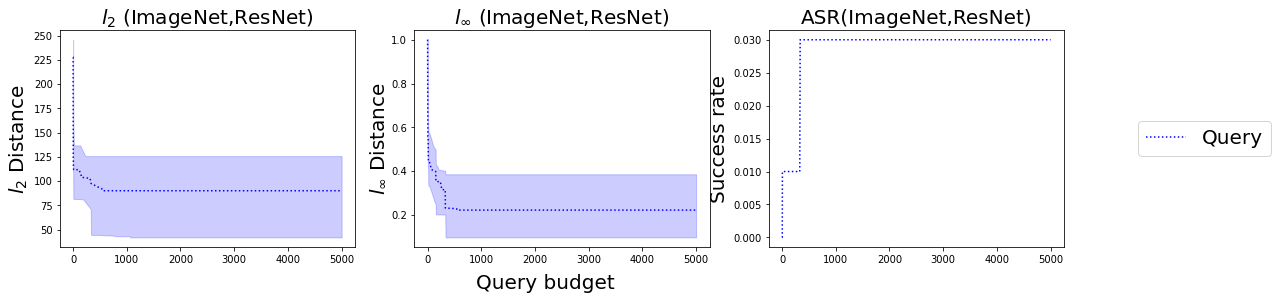

In [5]:
from Visualization import Result
Valid=100
fontsize=20
Range=5000
vis = Result(filename = File,pref=ImgPre,color='b',label="Query",marker=None,linestyle=":")
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(18,4))
#Ver3.Plot(0,Valid,1000,ax1)
vis.Plot(0,Valid,Range,ax1)
ax1.set_title('$l_2$ (ImageNet,ResNet)',size=fontsize)
ax1.set_ylabel('$l_2$ Distance',size=fontsize)


vis.Plot(1,Valid,Range,ax2)
ax2.set_title('$l_\infty$ (ImageNet,ResNet)',size=fontsize)
ax2.set_ylabel('$l_\infty$ Distance',size=fontsize)

infT = 16.01/255

vis.ASR(1,Valid,Range,infT,ax3)


ax3.set_title('ASR(ImageNet,ResNet)',size=fontsize)
ax3.set_ylabel('Success rate',size=fontsize)



fig.text(0.5, -0.00, 'Query budget', ha='center', va='center',fontsize=fontsize)

handles, labels = ax3.get_legend_handles_labels()

plt.legend(handles=handles,labels=labels,fontsize=fontsize,bbox_to_anchor=(1.7,0.5 ), loc=7, borderaxespad=0.)